In [19]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split # this function allows you to randomly split a datafarme
from sklearn.metrics import confusion_matrix, roc_curve # this function allows the visualization tool that analysis
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('diabete.csv')

In [3]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


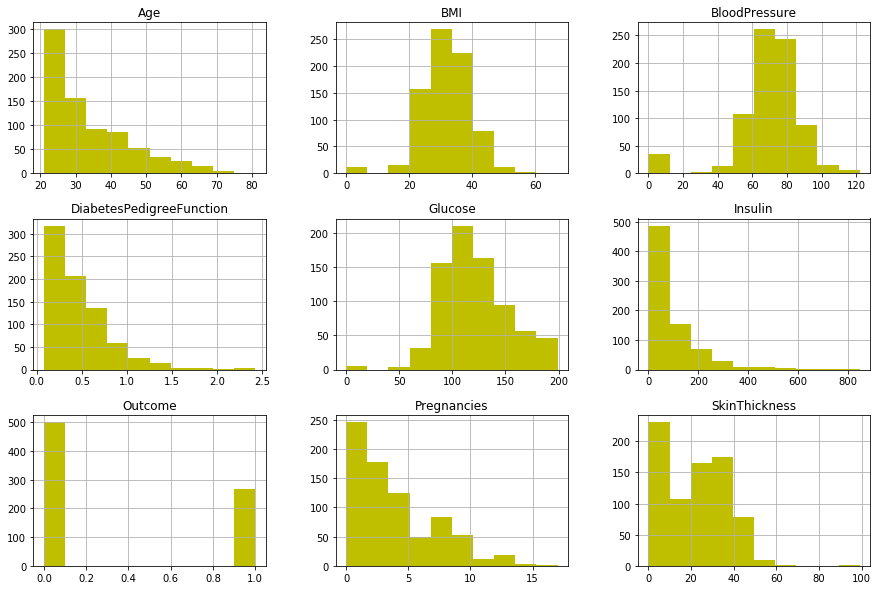

In [4]:
df.hist(figsize=(15,10), color = 'y')
plt.show()

RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

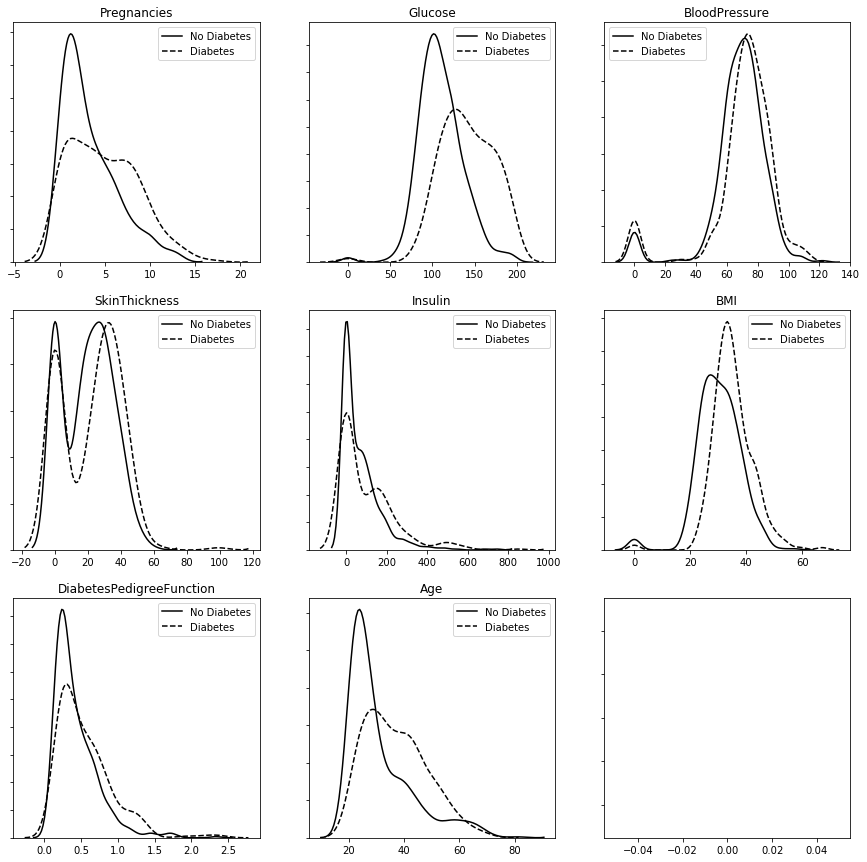

In [5]:
plt.subplots(3, 3, figsize = (15,15))
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx + 1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel=False, kde_kws={'linestyle':'-', 'color':'black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel=False, kde_kws={'linestyle':'--', 'color':'black', 'label':'Diabetes'})
    ax.set_title(col)

plt.subplot(3, 3, 9).set_visible(False)
plt.show()

In [ ]:
# Verificando se há colunas vazias
print(df.isnull().any())
print(df.describe())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000  

In [ ]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col] == 0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [ ]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [ ]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows = df.loc[df[col] == 0].shape[0]
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [ ]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [ ]:
df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df = df_scaled
print(df.describe().loc[['mean', 'std', 'max'],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00            0.0           0.00     0.00  0.00   
std          1.00     1.00            1.0           1.00     1.00  1.00   
max          3.91     2.54            4.1           7.95     8.13  5.04   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.00  
std                       1.00  1.00     1.00  
max                       5.88  4.06     1.37  


c:\Users\Crrea\miniconda3\envs\neural-network-projects-python\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


# Train Test Split Function

In [8]:
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [9]:
model = Sequential() #allows to construt a neural network like lego, stacking layers on top of oe another

In [10]:
# frist hidden layer : teh functio relu
model.add(Dense(32, activation='relu', input_dim=8))

In [11]:
# second hidden layer
model.add(Dense(16, activation='relu'))

In [12]:
# output layer
model.add(Dense(1, activation='sigmoid'))

## Compile model

In [13]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### let's to train the model

In [14]:
model.fit(X_train, y_train, epochs=200)



Epoch 1/200
491/491 [==============================] - 0s 537us/step - loss: 3.9767 - acc: 0.5173
Epoch 2/200
491/491 [==============================] - 0s 49us/step - loss: 2.6069 - acc: 0.4684
Epoch 3/200
491/491 [==============================] - 0s 51us/step - loss: 1.9642 - acc: 0.5051
Epoch 4/200
491/491 [==============================] - 0s 53us/step - loss: 1.5947 - acc: 0.5132
Epoch 5/200
491/491 [==============================] - 0s 39us/step - loss: 1.2904 - acc: 0.5764
Epoch 6/200
491/491 [==============================] - 0s 53us/step - loss: 1.1050 - acc: 0.5723
Epoch 7/200
491/491 [==============================] - 0s 52us/step - loss: 0.9777 - acc: 0.5845
Epoch 8/200
491/491 [==============================] - 0s 47us/step - loss: 0.9061 - acc: 0.5866
Epoch 9/200
491/491 [==============================] - 0s 45us/step - loss: 0.8431 - acc: 0.6212
Epoch 10/200
491/491 [==============================] - 0s 47us/step - loss: 0.8101 - acc: 0.6130
Epoch 11/200
491/491 [=====

In [15]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test)
print("Test Accuracy: %.2f%%\n" % (scores[1]*100))

491/491 [==============================] - 0s 92us/step
Training Accuracy: 74.54%

154/154 [==============================] - 0s 26us/step
Test Accuracy: 69.48%



### Confusion Matrix

Text(33.0, 0.5, 'Actual')

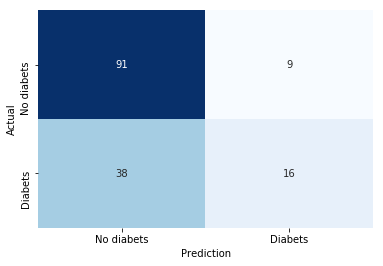

In [17]:
y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True,
                 xticklabels=['No diabets', 'Diabets'],
                 yticklabels=['No diabets', 'Diabets'],
                 cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

## ROC curve

Text(0, 0.5, 'True Positive Rate')

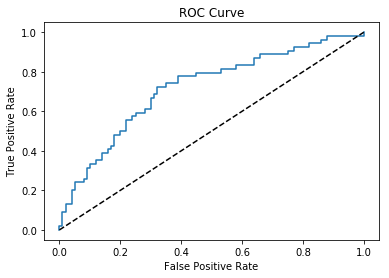

In [21]:
y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')